In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [4]:
sns.set_theme(style="darkgrid", context="paper", palette="winter")

In [5]:
data_org = pd.read_csv("./HR_Employee_Attrition_Data.csv")
data = data_org.copy()
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

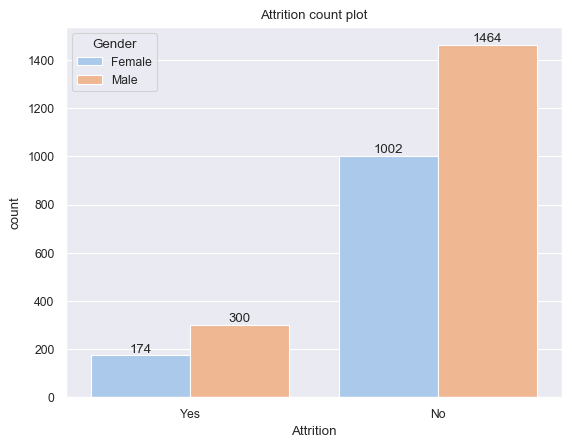

In [7]:
plot = sns.countplot(data=data,x='Attrition',hue='Gender',palette='pastel')
plt.title('Attrition count plot')
attrition_yes = data.loc[data['Attrition'] == 'Yes']
attrition_percent = 100 * (attrition_yes.shape[0] / len(data))
female_attrition_count = attrition_yes[attrition_yes.Gender == 'Female'].shape[0]
male_attrition_count = attrition_yes[attrition_yes.Gender == 'Male'].shape[0]
female_attrition_percent = (female_attrition_count/len(attrition_yes)) * 100

for i in plot.containers:
  plot.bar_label(i)

In [8]:
print(str(round(attrition_percent,2)) + "% of the employees choose to leave the company")
print(str(round(female_attrition_percent,2))+ "% of the employees who choose to leave the company are Females and " + str(100 - round(female_attrition_percent,2))+ "% are Males")
print("Female Attrition count = " + str(female_attrition_count))
print("Male Attrition count = " + str(male_attrition_count))
print("Total Employees in the dataset = " + str(len(data)))


16.12% of the employees choose to leave the company
36.71% of the employees who choose to leave the company are Females and 63.29% are Males
Female Attrition count = 174
Male Attrition count = 300
Total Employees in the dataset = 2940


In [9]:
data.describe()['DailyRate']

count    2940.000000
mean      802.485714
std       403.440447
min       102.000000
25%       465.000000
50%       802.000000
75%      1157.000000
max      1499.000000
Name: DailyRate, dtype: float64

In [10]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              2940
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [11]:
obj_cols = data.select_dtypes(object).columns
for col in obj_cols:
    print(col,data[col].unique())

Attrition ['Yes' 'No']
BusinessTravel ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department ['Sales' 'Research & Development' 'Human Resources']
EducationField ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender ['Female' 'Male']
JobRole ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus ['Single' 'Married' 'Divorced']
Over18 ['Y']
OverTime ['Yes' 'No']


Identifying categorical columns that are already encoded in some numerical format. 

In [12]:
#Dropping null values rows and duplicates 
data_len = len(data)
data.dropna(inplace=True) 
data.drop_duplicates(inplace=True)
print (f"# of rows dropped = {data_len - len(data)}")

# of rows dropped = 0


In [13]:
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1,inplace=True) 
### First 3 columns have 0 variance and the last one is just an id so dropping the columns

In [14]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
bool_cols = ["Attrition","Gender","OverTime","MaritalStatus"]
le = {}
for i in bool_cols:
    le[i] = LabelEncoder()
    data[i] = le[i].fit_transform(data[i])
data.head()     

oe = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])
data['BusinessTravel'] = oe.fit_transform(data[['BusinessTravel']])

In [16]:
from sklearn.preprocessing import OneHotEncoder
categorical_data = ['EducationField','JobRole','Department']
ohe = OneHotEncoder(sparse_output=False)
encoded_data = ohe.fit_transform(data[categorical_data])
data_categorical = pd.DataFrame(encoded_data,columns=ohe.get_feature_names_out(categorical_data))
data.drop(categorical_data,inplace=True,axis=1)
data = pd.concat((data,data_categorical),axis=1)

#### no null values to deal with

#### data visualization 

In [17]:
# visualizing the correlation of all the variables with the target value
data.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime                             0.246118
MaritalStatus                        0.162070
JobRole_Sales Representative         0.157234
BusinessTravel                       0.127006
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender                               0.029453
JobRole_Sales Executive              0.019774
Department_Human Resources           0.016832
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
PercentSalaryHike                   -0.013478
EducationField_Other              

In [18]:
#### Visualizing the correlation matrix. Removing all the 
#### encoded_columns to understand the correlation between the other columns

#### Visualizing the correlation matrix

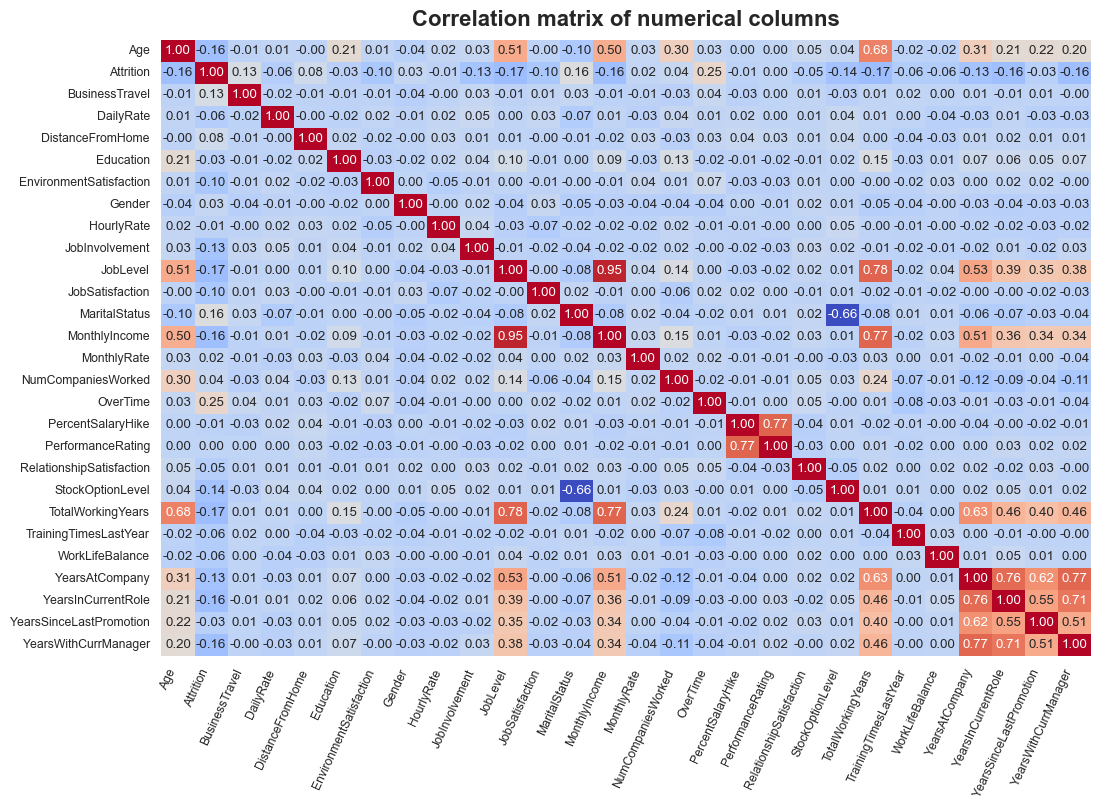

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(data.drop(list(data_categorical.columns),axis=1).corr(),annot=True,fmt='.2f',
            cbar=False,cmap='coolwarm')
plt.xticks(rotation=65,ha='right')
plt.title("Correlation matrix of numerical columns",fontweight="heavy",pad=10,fontsize=16)
plt.show()
plt.close()
plt.tight_layout()

In [20]:
####  pairing highly correlated datasets numeric vs categorical
corr_cat_tuples = (("PercentSalaryHike","PerformanceRating"),
("MonthlyIncome","JobLevel"),("TotalWorkingYears","JobLevel"))
corr_num_tuple = (("YearsAtCompany","YearsWithCurrManager"),("YearsWithCurrRole","YearsWithCurrManager"))

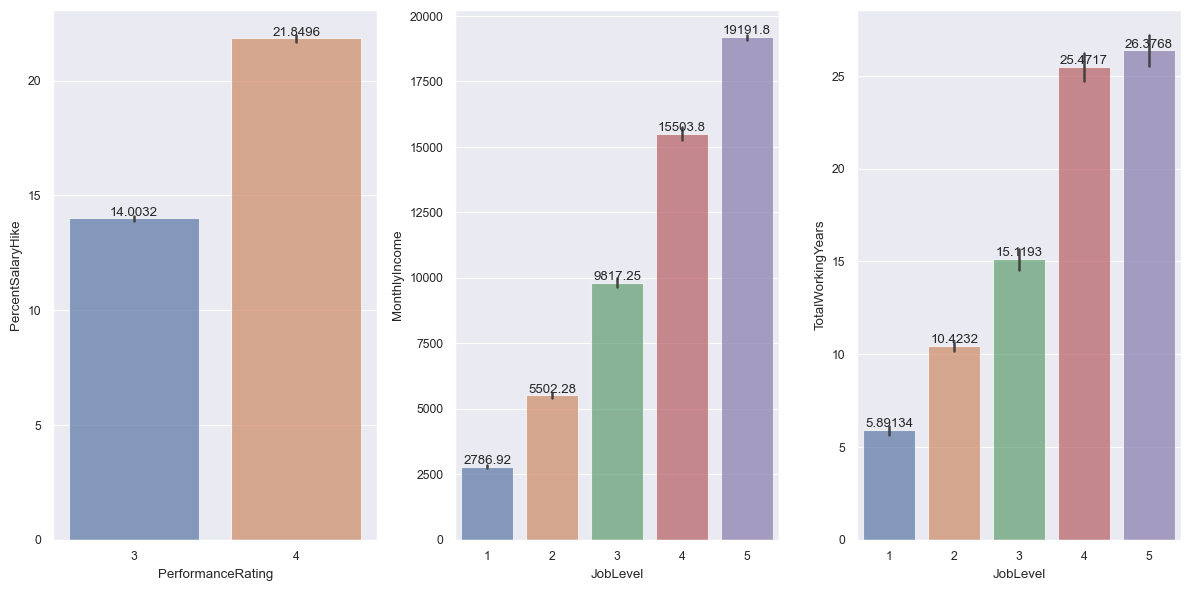

In [21]:
fig,axes = plt.subplots(1,3,figsize=(12,6))
ax = axes.ravel()
for i,tup in enumerate(corr_cat_tuples):
    barplot = sns.barplot(data=data, 
                x=tup[1], 
                y=tup[0], 
                ax=ax[i],
                palette="deep",
                estimator='mean',
                alpha=0.7)
    for val in barplot.containers:
        barplot.bar_label(val)
plt.tight_layout()    

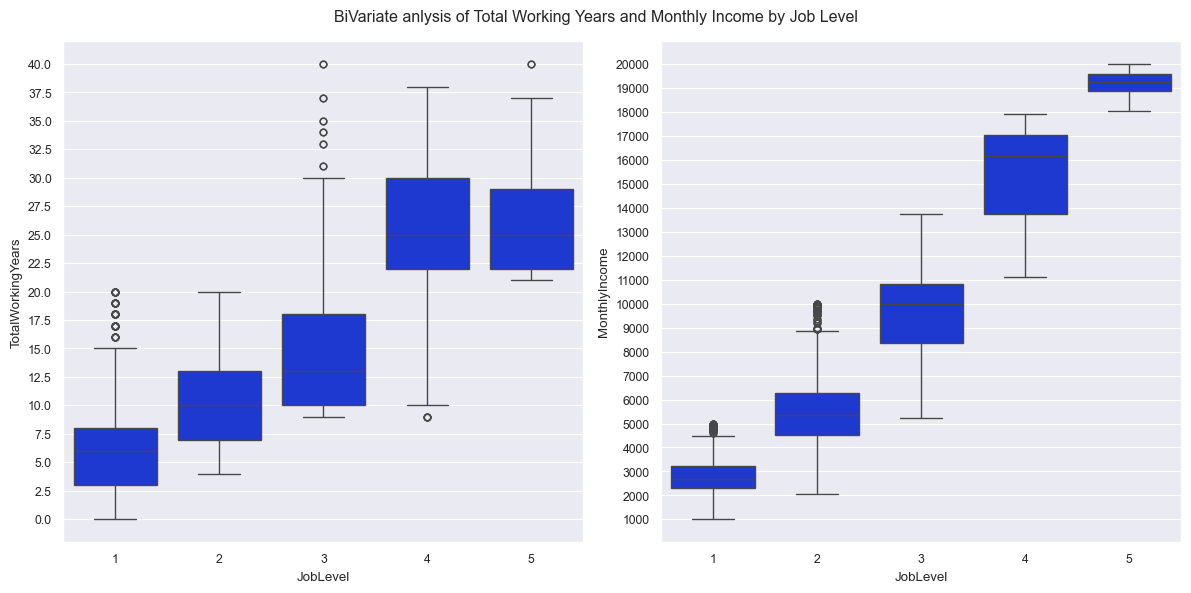

In [22]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
ax[0].set_yticks(np.arange(0,41,2.5))
ax[1].set_yticks(np.arange(0,20001,1000))
sns.boxplot(x="JobLevel",y="TotalWorkingYears",ax=ax[0],data=data)
sns.boxplot(x="JobLevel",y="MonthlyIncome",ax=ax[1],data=data)
plt.suptitle('BiVariate anlysis of Total Working Years and Monthly Income by Job Level')
plt.tight_layout() 

- Even though there is a strong correlation between the variables for the graphs above . 
- We will retain Job level as it is important factor that affects monthly income which directly contributes to job satisfaction/attrition
- We will retain performance rating as well due to its direct impact on salary hike and reduced attrition 
- This is indicated by a negative correlation. 

In [23]:
cat_num_enc_cols = [] 
# categorical columns that are numerically encoded
for col in data.select_dtypes('number').columns:
    uniques = data[col].unique()
    if len(uniques) < 10:
        cat_num_enc_cols.append(col)
        print(col,uniques) 

Attrition [1 0]
BusinessTravel [1. 2. 0.]
Education [2 1 4 3 5]
EnvironmentSatisfaction [2 3 4 1]
Gender [0 1]
JobInvolvement [3 2 4 1]
JobLevel [2 1 3 4 5]
JobSatisfaction [4 2 3 1]
MaritalStatus [2 1 0]
OverTime [1 0]
PerformanceRating [3 4]
RelationshipSatisfaction [1 4 2 3]
StockOptionLevel [0 1 3 2]
TrainingTimesLastYear [0 3 2 5 1 4 6]
WorkLifeBalance [1 3 2 4]
EducationField_Human Resources [0. 1.]
EducationField_Life Sciences [1. 0.]
EducationField_Marketing [0. 1.]
EducationField_Medical [0. 1.]
EducationField_Other [0. 1.]
EducationField_Technical Degree [0. 1.]
JobRole_Healthcare Representative [0. 1.]
JobRole_Human Resources [0. 1.]
JobRole_Laboratory Technician [0. 1.]
JobRole_Manager [0. 1.]
JobRole_Manufacturing Director [0. 1.]
JobRole_Research Director [0. 1.]
JobRole_Research Scientist [0. 1.]
JobRole_Sales Executive [1. 0.]
JobRole_Sales Representative [0. 1.]
Department_Human Resources [0. 1.]
Department_Research & Development [0. 1.]
Department_Sales [1. 0.]


### Numerical Feature Engineering/Transformation and Visualiazation

['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


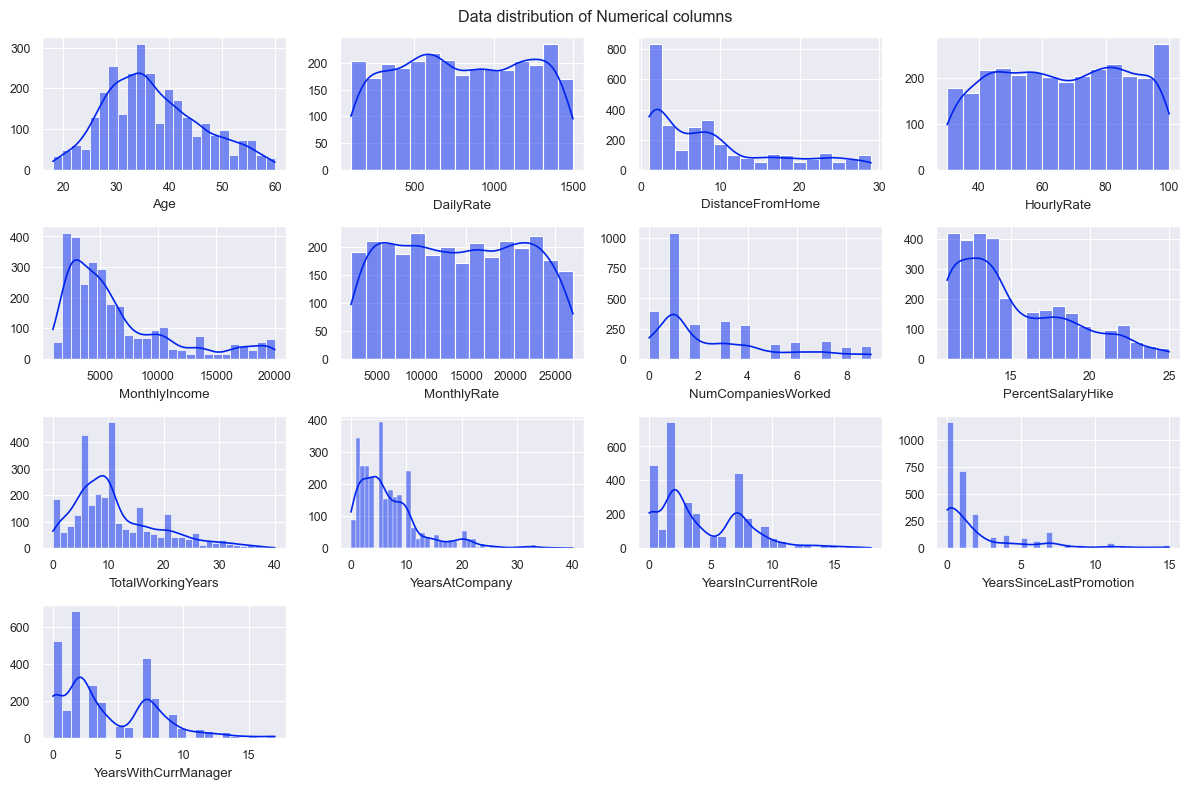

In [24]:
#Plotting the distribution of the plots for analysis of skewedness and feature transformations

# Extract numerical columns by excluding categorical and object columns
non_numeric_columns = list(obj_cols.values) + cat_num_enc_cols + list(ohe.get_feature_names_out(categorical_data))
numerical_cols = [val for val in data.columns.values if val not in non_numeric_columns]
print(numerical_cols)
# Calculate the number of rows needed for the subplots
num_rows = (len(numerical_cols) // 4) + 1

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(num_rows, 4,figsize=(12,8))
plt.suptitle("Data distribution of Numerical columns")

# Flatten the axes array for easier indexing
ax = axes.ravel()

# Plot histograms for each numerical column
for i in range(len(numerical_cols)):
    sns.histplot(data=data, x=numerical_cols[i], ax=ax[i],kde=True)
    ax[i].set_ylabel('')
    
# Hide any unused axes
for j in range(len(numerical_cols), len(ax)):
    ax[j].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()

In [25]:
# Feature transformation and reduction
experience_features = ['YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager','TotalWorkingYears']
data['StabilityIndex'] = data['YearsAtCompany'] + 0.5* data['YearsInCurrentRole'] + 0.5 * data['YearsWithCurrManager']
data['AverageTenure']  = data[experience_features].mean(axis=1)
data.drop(experience_features,axis=1,inplace=True)

## Applying log transformation on skewed distributions
log_transformed_cols = {'LogDistFromHome':'DistanceFromHome','LogPercentSalaryHike':'PercentSalaryHike',
                        'LogStabilityIndex':'StabilityIndex','LogAverageTenure':'AverageTenure'}
for key,value in log_transformed_cols.items():
    data[key] = data[value].apply(np.log1p)
    
data.drop(list(log_transformed_cols.values()),axis=1,inplace=True)
# bining age parameter
age_params = {
    "bins": [18, 25, 40, 50,61],
    "labels": [1,2,3,4],
    "right": False
}
data["Age"] = pd.cut(data["Age"],**age_params)

<Figure size 640x480 with 0 Axes>

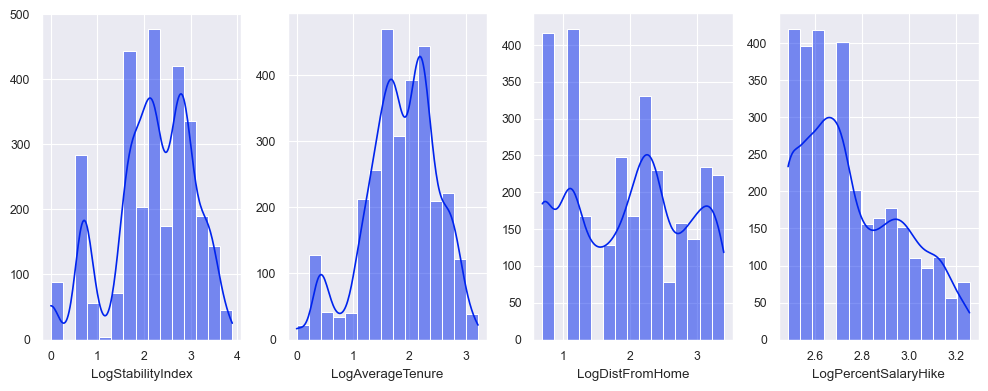

In [26]:
# Set up the figure and axes for the subplots
plt.suptitle("Data distribution plots")
fig, axes = plt.subplots(1, 4,figsize=(10,4))

# Flatten the axes array for easier indexing
ax = axes.ravel()
cols = ['LogStabilityIndex','LogAverageTenure','LogDistFromHome','LogPercentSalaryHike']
# Plot histograms for each numerical column
for i in range(len(cols)):
    sns.histplot(data=data, x=cols[i], ax=ax[i],kde=True,bins=15)
    ax[i].set_ylabel('')
plt.tight_layout()
plt.show()

#### The defined Age groups are as follows
- 1 => 18 - 24
- 2 => 25 - 39
- 3 => 40 - 49
- 4 => 50 - 61

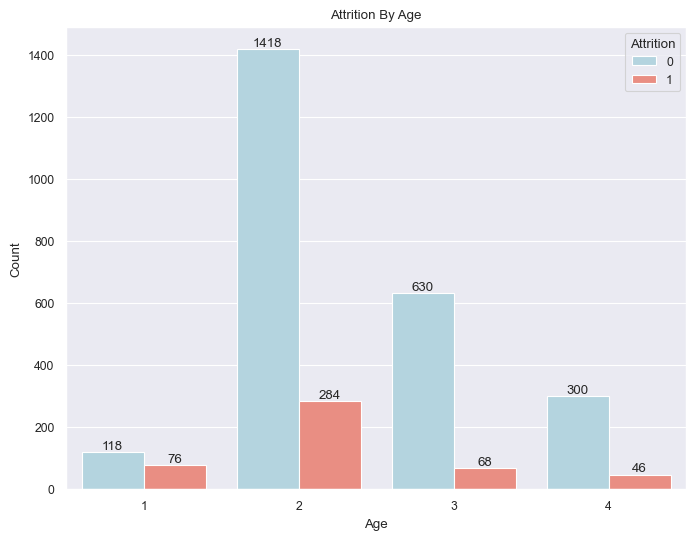

In [27]:
#Attrition rate by age group
plt.figure(figsize=(8,6))
plot  = sns.countplot(data=data, x='Age', hue='Attrition', palette={0: 'lightblue', 1: 'salmon'})
for x in plot.containers:
    plot.bar_label(x)
plt.ylabel("Count")
plt.title('Attrition By Age')
plt.show()

#Attrition is high on the age group of 25-40

In [28]:
### chi squared test for Attrition and age
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['Age'], data['Attrition'])

# Performing the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 99.69589319722417
p-value: 1.8066874239973985e-21
Degrees of freedom: 3
Expected frequencies:
 [[ 162.72244898   31.27755102]
 [1427.59591837  274.40408163]
 [ 585.46530612  112.53469388]
 [ 290.21632653   55.78367347]]


#### Interpretation of stats result
- Given the pvalue >> 0.05 and observation in the graph we reject the null hypothesis of independence
- A higher chi-square statistic suggests a greater discrepancy between observed and expected frequencies,
- indicating a potential association between the variables.

### Outlier Treatment

In [29]:
from sklearn.base import BaseEstimator,TransformerMixin

# outlier correction for some important features
outlier_attributes = [
    'MonthlyIncome',  
    'NumCompaniesWorked',
    'YearsSinceLastPromotion',
    'LogStabilityIndex',
    'LogAverageTenure',
    'LogDistFromHome',
    'LogPercentSalaryHike',
]

# outlier remover preprocessor

class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5,columns=None):
        self.factor = factor
        self.columns = columns
    def fit(self,X):
        q1 = X[self.columns].quantile(0.25)
        q3 = X[self.columns].quantile(0.75)
        iqr = q3 - q1
        self.upper_bound_ = q3 + self.factor * iqr
        self.lower_bound_ = q1 - self.factor * iqr
        return self
    def transform(self,X):
        X_updated = X.copy()
        mask = ((X[self.columns] > self.lower_bound_) & (X[self.columns] < self.upper_bound_)).all(axis=1)
        X_updated = X_updated[mask]
        return X_updated   

out_rem = OutlierRemover(columns=outlier_attributes)
data_len = len(data)
data = out_rem.fit_transform(data)
data_cleaned_len = len(data)
print(f"Outlier Data % removed from analysis : {round((data_len - data_cleaned_len)*100/data_len)}%")

Outlier Data % removed from analysis : 19%


### Analysing the Satisfaction parameters in detail 

In [30]:
satisfaction_params = [val for val in data.columns.values if "satisfaction" in val.lower()]
data[satisfaction_params]

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction
0,2,4,1
1,3,2,4
3,4,3,3
5,4,4,3
6,3,1,1
...,...,...,...
2935,3,4,3
2936,4,1,1
2937,2,2,2
2938,4,2,4


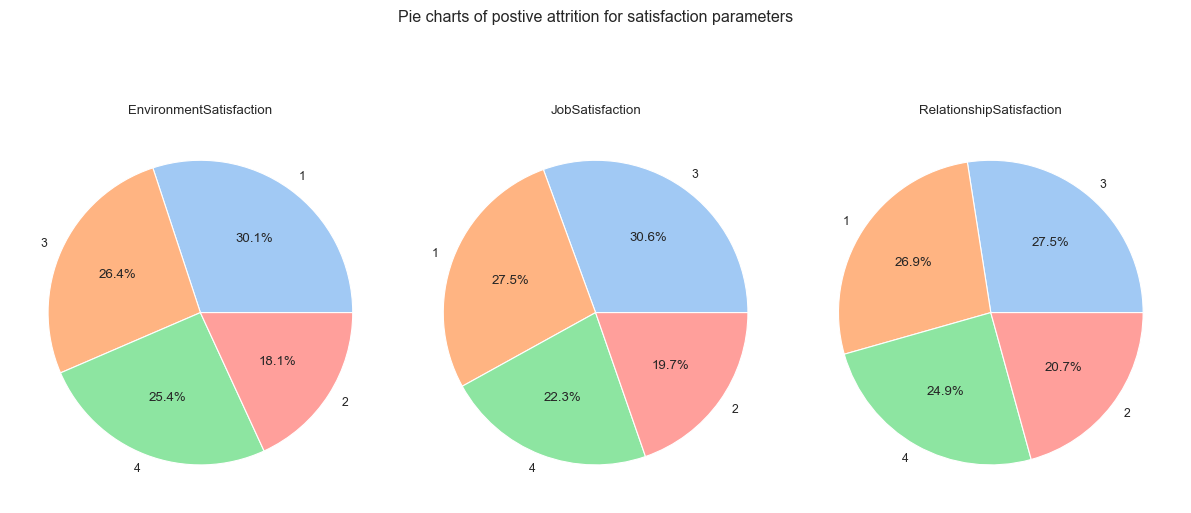

In [31]:
data_attr_true = data.groupby('Attrition').get_group(1)
percentages = {}
for param in satisfaction_params:
    percentages[param] = data_attr_true[param].value_counts(normalize=True)*100
fig,ax = plt.subplots(1,3,figsize=(12,6))
plt.suptitle("Pie charts of postive attrition for satisfaction parameters")
for i,val in enumerate(percentages):
    ax[i].pie(percentages[val].values,labels=percentages[val].index.values,autopct='%.1f%%',
              colors=sns.color_palette("pastel", 5))
    ax[i].set_title(val)
plt.tight_layout()
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop("Attrition",axis=1),data["Attrition"],test_size=0.2,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import joblib 
import os

model_file_name = 'best_rf_model.pkl'
model_params_file_name = 'best_params.pkl'
best_model = None
if(os.path.exists(model_file_name)):
  best_model = joblib.load(model_file_name)
  best_params = joblib.load(model_params_file_name)
  print("Loaded model from disk")
  print("Best parameters:", best_params)
else:  
  rf = RandomForestClassifier(random_state=42)
  param_grid = {
    "min_samples_split":[2,4],
    "min_samples_leaf":[1,3],
    "bootstrap":[True],
    "max_depth":[3,4,5,6,7],
    "max_features":['sqrt','log2',None]
  }
  print("Finding best model for RF")
  grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)
  grid_search.fit(X_train, y_train)
  # Output best parameters
  print("Best parameters:", grid_search.best_params_)
  print("Best cross-validation accuracy:", grid_search.best_score_)
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_
  joblib.dump(best_model,model_file_name)
  joblib.dump(grid_search.best_params_,model_params_file_name)

Loaded model from disk
Best parameters: {'bootstrap': True, 'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### Clean up disk code 

In [34]:
# if os.path.exists(model_file_name):
#   os.remove(model_file_name)
#   print("model deleted from the disk")
# if os.path.exists(model_params_file_name):
#   os.remove(model_params_file_name)  
#   print("best params deleted from disk")

#### Calculating the optimal no of trees for the forest

In [35]:
n_estimators_range = range(5,301,5)
oob_error = []
for i in n_estimators_range:
  rf = RandomForestClassifier(
        n_estimators=i,
        oob_score=True,
        random_state=21,
        **best_params
    )
  rf.fit(X_train,y_train)
  oob_error.append(1-rf.oob_score_)   

155 0.096


Text(0.5, 1.0, 'OOB error vs No of trees')

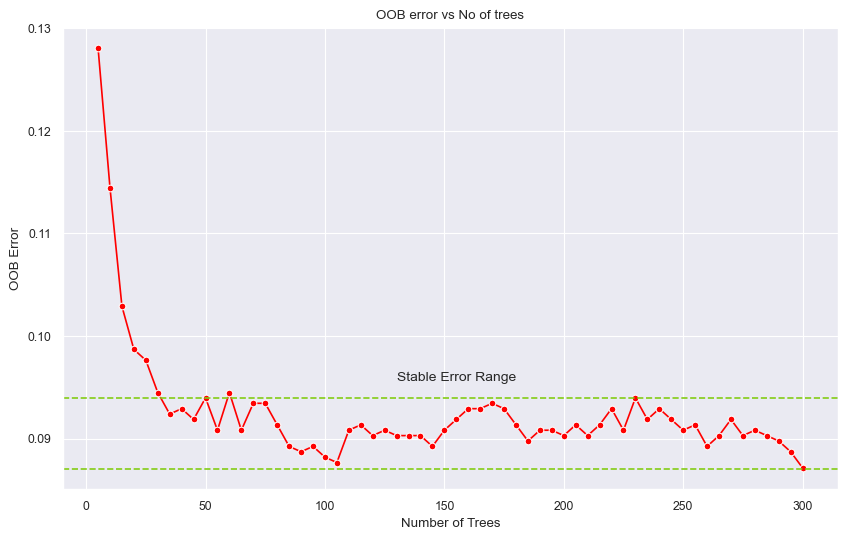

In [36]:
y_text = 0.096
x_text = n_estimators_range[len(n_estimators_range) // 2]
print(x_text,y_text)
plt.figure(figsize=(10,6))
sns.lineplot(y=oob_error,x=list(n_estimators_range),marker='o' ,color="r")
plt.text(x_text,y_text,'Stable Error Range', fontsize=10, ha='center', va='center')
plt.axhline(0.094,linestyle='--',color='#84cc16')
plt.axhline(0.087,linestyle='--',color='#84cc16')
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title("OOB error vs No of trees")

Finding the stable error rate

In [37]:
from scipy import stats as st
stable_error = st.mode(np.array(oob_error)).mode
trees_arr = np.array(n_estimators_range)
no_of_trees_optimal = trees_arr[np.where(np.array(oob_error) == stable_error)][0]
print(f"{no_of_trees_optimal} is the optimal value for no of trees in the forest")

55 is the optimal value for no of trees in the forest


In [38]:
rf = RandomForestClassifier(
        n_estimators=no_of_trees_optimal,
        oob_score=True,
        random_state=21,
        **best_params
    )
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, max_features=None, n_estimators=55,
                       oob_score=True, random_state=21)

#### Evaluating the model performance

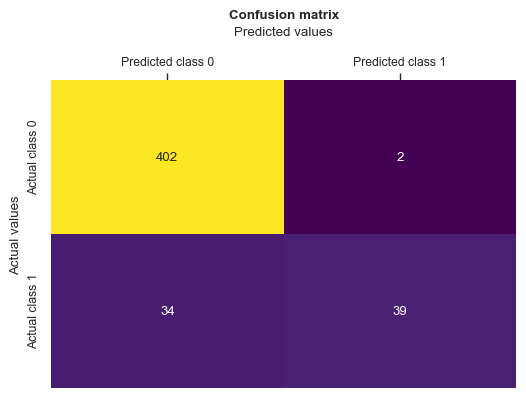

In [39]:
# Plotting the confusion matrix
y_pred = rf.predict(X_test)
conf_mat = pd.crosstab(index = y_test,columns=y_pred).values
fig,ax = plt.subplots(figsize=(6,4))
columns= ['Predicted class 0','Predicted class 1']
index= ['Actual class 0','Actual class 1']
sns.heatmap(pd.DataFrame(conf_mat,index=index,columns=columns),annot=True,xticklabels=columns,yticklabels=index,cmap='viridis',fmt='d',cbar=False)
plt.title("Confusion matrix",fontweight='bold')
plt.xlabel("Predicted values",labelpad=15)
plt.ylabel("Actual values")
ax.xaxis.set_label_position('top')
ax.xaxis.set_ticks_position('top')
plt.show()
plt.close()

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       404
           1       0.95      0.53      0.68        73

    accuracy                           0.92       477
   macro avg       0.94      0.76      0.82       477
weighted avg       0.93      0.92      0.92       477



- we can see that the recall on the +ve class is fairly low. But since our objective is to determine the factors that cause attrition and take corrective measures . Identifying the true positives is not as important as the cost of the false positive. Hence we wall prioritize Precision of class 1 (attrition = YES).
- Value corresponding to the precision of class 1 is 0.95 which is fairly high hence adjusting the threshold values for probability predicition is not a necessity

In [41]:
score = rf.score(X_test,y_test)
score

0.9245283018867925

### Evaluating RF Model using the ROC metrics and PR metrics

Area under ROC Curve : 0.96


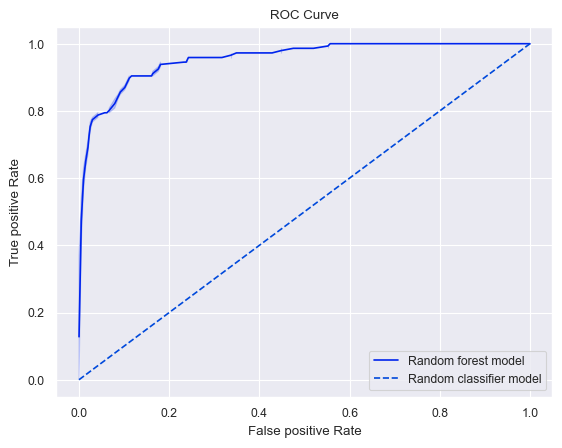

In [83]:
from sklearn.metrics import roc_curve,auc
predict_prob = rf.predict_proba(X_test) # gives [a,b] where a is predicted probability of class 0 and b is probability it belongs to class 1
predict_prob,y_pred[0]
fpr,tpr,_ = roc_curve(y_test,predict_prob[:,1])
area_under_curve = auc(fpr,tpr)
print("Area under ROC Curve : " + str(round(area_under_curve,2)))
sns.lineplot(y=tpr,x=fpr,label='Random forest model')
sns.lineplot(y=[0,1],x=[0,1],linestyle='--',label='Random classifier model')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("ROC Curve")
plt.legend()


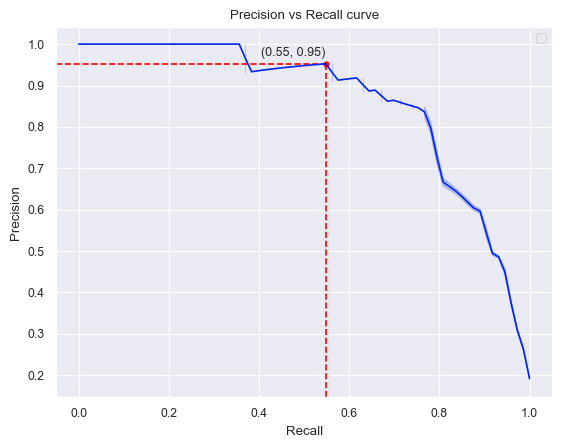

In [77]:
# Plotting the precision vs recall curve 
from sklearn.metrics import precision_recall_curve
precisions,recalls,_ = precision_recall_curve(y_test,predict_prob[:,1])

#calculating some meta information for plotting and labelling
index_where_precision_95 = np.argmax(precisions >= 0.95) + 1
precision,recall = precisions[index_where_precision_95],recalls[index_where_precision_95]
sns.scatterplot(x=[recall],y=[precision] ,color='r',s=25)
plt.text(recall, precision+0.02, f'({recall:.2f}, {precision:.2f})', 
         fontsize=9, ha='right')
plt.axhline(y = precision,linestyle='--',color='r',xmax=recall)
plt.axvline(x = recall,ymax = precision-0.05,linestyle='--',color='r')
sns.lineplot(y=precisions,x=recalls)
plt.title("Precision vs Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()
plt.close()

#### Plotting the feature importances in descending order

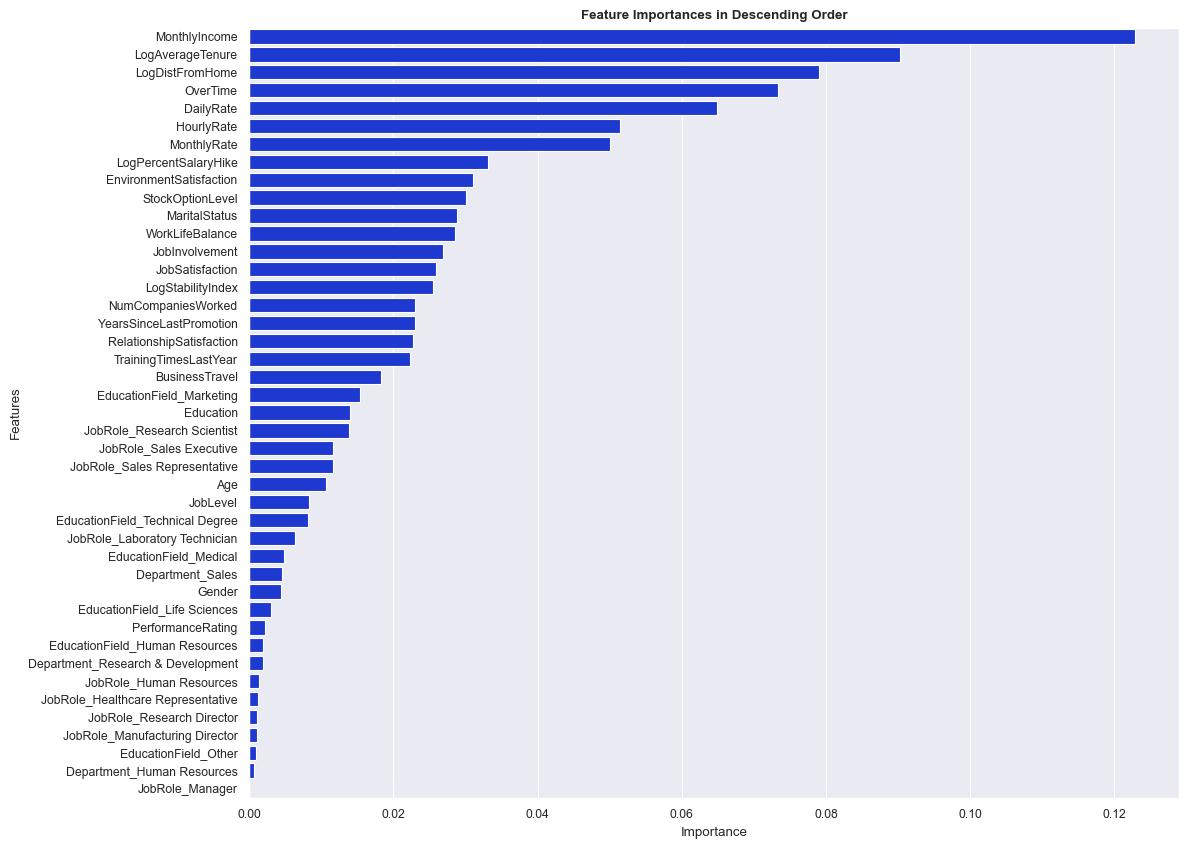

Top 10 features that affect attrition
feature 1: MonthlyIncome
feature 2: AverageTenure
feature 3: DistFromHome
feature 4: OverTime
feature 5: DailyRate
feature 6: HourlyRate
feature 7: MonthlyRate
feature 8: PercentSalaryHike
feature 9: EnvironmentSatisfaction
feature 10: StockOptionLevel


In [78]:
feature_importances = rf.feature_importances_
feature_names = rf.feature_names_in_

# Sort the features by importance
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot
plt.figure(figsize=(12, 10))
sns.barplot(y=sorted_feature_names, x=sorted_importances, orient='h')
plt.title("Feature Importances in Descending Order", fontweight='bold')
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()
print("Top 10 features that affect attrition")
modifier = lambda x: x if 'Log' not in x else x.replace('Log', '')
for i in range(10):
  print(f"feature {i + 1}: {modifier(sorted_feature_names[i])}")

In [80]:
print(modifier("LogAss"))

Ass


In [ ]:
)